In [ ]:
import glob

from potoo.plot import *
from potoo.util import *
import sklearn

from cache import *
from constants import *
from datasets import *
from features import *
from load import *
from sp14.model import *
from util import *
from viz import *

figsize('inline_short');

In [ ]:
load = Load()
recs = load.recs(
    # limit=30,  # XXX Faster dev
    datasets=[
        'peterson-field-guide',
        'recordings',
    ],
)
display(
    df_summary(recs),
    recs[:5],
)

[06:35:58.663] Load.metadata:in
  len(recs): 633
  len(recs) per dataset: {peterson-field-guide: 535, recordings: 98}
[                                                                                          ] | 0% Completed |  0.0s

[##############                                                                            ] | 16% Completed |  0.1s

[##################################                                                        ] | 38% Completed |  0.2s

[######################################################                                    ] | 60% Completed |  0.3s

[########################################################################                  ] | 80% Completed |  0.4s

[##########################################################################################] | 100% Completed |  0.5s

[06:35:59.261] Load.metadata:out
  sum(duration_h): 5.07
  sum(samples_mb): 768.0
  sum(samples_n): 402551191
  n_species: 55


,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path
dtype,object,category,category,object,float64,float64,int64,object,category,object,object
sizeof,51.6 KiB,11.4 KiB,11.9 KiB,43.8 KiB,9.9 KiB,9.9 KiB,9.9 KiB,55.7 KiB,12.3 KiB,74.6 KiB,77.1 KiB
len,633,633,633,633,633,633,633,633,633,633,633
count,633,633,633,633,633,633,633,633,633,633,633
nunique,2,55,55,64,537,537,537,633,55,633,633
mean,NaN,NaN,NaN,NaN,28.841,1.213,635941.850,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,32.301,1.358,712235.547,NaN,NaN,NaN,NaN
min,peterson-field-guide,SCQU,Scaled Quail,BEWR,2.74,0.115,60480,081845,Scaled Quail - SCQU,peterson-field-guide/amecro/audio/43215281 Caw (clear),peterson-field-guide/amecro/audio/43215281 Caw (clear).mp3
25%,peterson-field-guide,TUTI,Tufted Titmouse,bewwre,15.50,0.650,340992,43217721 Chick-a-dee Call,Tufted Titmouse - TUTI,peterson-field-guide/canwre/audio/43219271 Male Song (unusual),peterson-field-guide/canwre/audio/43219271 Male Song (unusual).mp3
50%,peterson-field-guide,WIWR,Winter Wren,comrav,21.40,0.901,472320,43219841 Churt,Winter Wren - WIWR,peterson-field-guide/marwre/audio/44412311 Chit,peterson-field-guide/marwre/audio/44412311 Chit.mp3


,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path
479,peterson-field-guide,SCQU,Scaled Quail,scaqua,12.30,0.517,271296,43186591 Kuk-curr Series,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186591 Kuk-curr Series,peterson-field-guide/scaqua/audio/43186591 Kuk-curr Series.mp3
485,peterson-field-guide,SCQU,Scaled Quail,scaqua,12.10,0.509,266688,43186661 Chip-seer,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186661 Chip-seer,peterson-field-guide/scaqua/audio/43186661 Chip-seer.mp3
486,peterson-field-guide,SCQU,Scaled Quail,scaqua,15.60,0.657,344448,43186671 Kuk,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186671 Kuk,peterson-field-guide/scaqua/audio/43186671 Kuk.mp3
487,peterson-field-guide,SCQU,Scaled Quail,scaqua,7.73,0.325,170496,43186681 Wing sounds & Kuk,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186681 Wing sounds & Kuk,peterson-field-guide/scaqua/audio/43186681 Wing sounds & Kuk.mp3
482,peterson-field-guide,SCQU,Scaled Quail,scaqua,10.10,0.423,221760,43186621 Zreek Series,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186621 Zreek Series,peterson-field-guide/scaqua/audio/43186621 Zreek Series.mp3


In [ ]:
# Stats
(recs
    .assign(
        n=1,
        duration_h=lambda df: df.duration_s / 3600,
        samples_gb=lambda df: df.samples_mb / 1024,
        species=lambda df: df.species.cat.remove_unused_categories(),  # Else groupby includes all categories
    )
    .groupby([
        'dataset',
        'species',
    ])
    [['n', 'duration_h', 'samples_gb', 'samples_n']]
    .sum()
    .dropna()
)

n  duration_h  samples_gb  samples_n
dataset              species                                         
peterson-field-guide SCQU     11.0       0.052   7.749e-03  4.160e+06
                     MONQ      9.0       0.052   7.715e-03  4.142e+06
                     WITU     13.0       0.087   1.289e-02  6.920e+06
                     OSPR      7.0       0.038   5.593e-03  3.003e+06
                     KILL     10.0       0.052   7.715e-03  4.142e+06
                     BEKI      7.0       0.036   5.353e-03  2.874e+06
                     AMCR     17.0       0.103   1.526e-02  8.194e+06
                     CORA     17.0       0.107   1.581e-02  8.486e+06
                     CACH     18.0       0.092   1.366e-02  7.336e+06
                     BCCH     19.0       0.082   1.215e-02  6.526e+06
                     BOCH     12.0       0.065   9.655e-03  5.183e+06
                     TUTI     26.0       0.144   2.124e-02  1.140e+07
                     BCTI     20.0       0.119   1.765e-02  9.476e+06
                     BUSH     12.0       0.050   7.447e-03  3.998e+06
                     RBNU     16.0       0.102   1.508e-02  8.095e+06
                     WBNU     17.0       0.082   1.213e-02  6.513e+06
                     BRCR     17.0       0.083   1.226e-02  6.583e+06
                     ROWR     13.0       0.086   1.264e-02  6.788e+06
                     CANW     15.0       0.068   1.011e-02  5.428e+06
                     HOWR     20.0       0.126   1.866e-02  1.002e+07
                     WIWR      9.0       0.091   1.342e-02  7.205e+06
                     SEWR     11.0       0.079   1.169e-02  6.275e+06
                     MAWR     20.0       0.141   2.087e-02  1.120e+07
                     CARW     19.0       0.098   1.447e-02  7.767e+06
                     BEWR     19.0       0.114   1.688e-02  9.060e+06
                     CACW     14.0       0.068   1.000e-02  5.369e+06
                     SWTH     15.0       0.091   1.349e-02  7.240e+06
                     HETH     18.0       0.119   1.756e-02  9.430e+06
                     AMRO     19.0       0.103   1.527e-02  8.199e+06
                     EUST     18.0       0.115   1.704e-02  9.147e+06
                     CEDW      7.0       0.036   5.373e-03  2.885e+06
                     OCWA     16.0       0.096   1.417e-02  7.610e+06
                     WIWA     15.0       0.092   1.358e-02  7.293e+06
                     WCSP     20.0       0.089   1.311e-02  7.036e+06
                     SOSP     19.0       0.094   1.389e-02  7.460e+06
recordings           OSPR      1.0       0.025   3.682e-03  1.977e+06
                     RTHA      4.0       0.047   6.977e-03  3.746e+06
                     HAWO      2.0       0.032   4.754e-03  2.552e+06
                     PSFL      1.0       0.015   2.209e-03  1.186e+06
                     BLPH      2.0       0.032   4.771e-03  2.561e+06
                     HUVI      1.0       0.024   3.622e-03  1.944e+06
                     STJA      1.0       0.019   2.822e-03  1.515e+06
                     CASJ      2.0       0.070   1.029e-02  5.525e+06
                     CORA      2.0       0.029   4.257e-03  2.285e+06
                     RBNU      1.0       0.037   5.508e-03  2.957e+06
                     BRCR      1.0       0.009   1.282e-03  6.884e+05
                     MAWR      1.0       0.006   9.482e-04  5.091e+05
                     BEWR      3.0       0.030   4.400e-03  2.362e+06
                     GRCA      1.0       0.019   2.819e-03  1.514e+06
                     CATH      2.0       0.034   5.026e-03  2.698e+06
                     NOMO      1.0       0.017   2.544e-03  1.366e+06
                     BTYW      1.0       0.017   2.443e-03  1.312e+06
                     HEWA      1.0       0.097   1.435e-02  7.703e+06
                     WIWA      2.0       0.022   3.217e-03  1.727e+06
                     FOSP      1.0       0.032   4.674e-03  2.509e+06
                     WCSP      2.0       0.

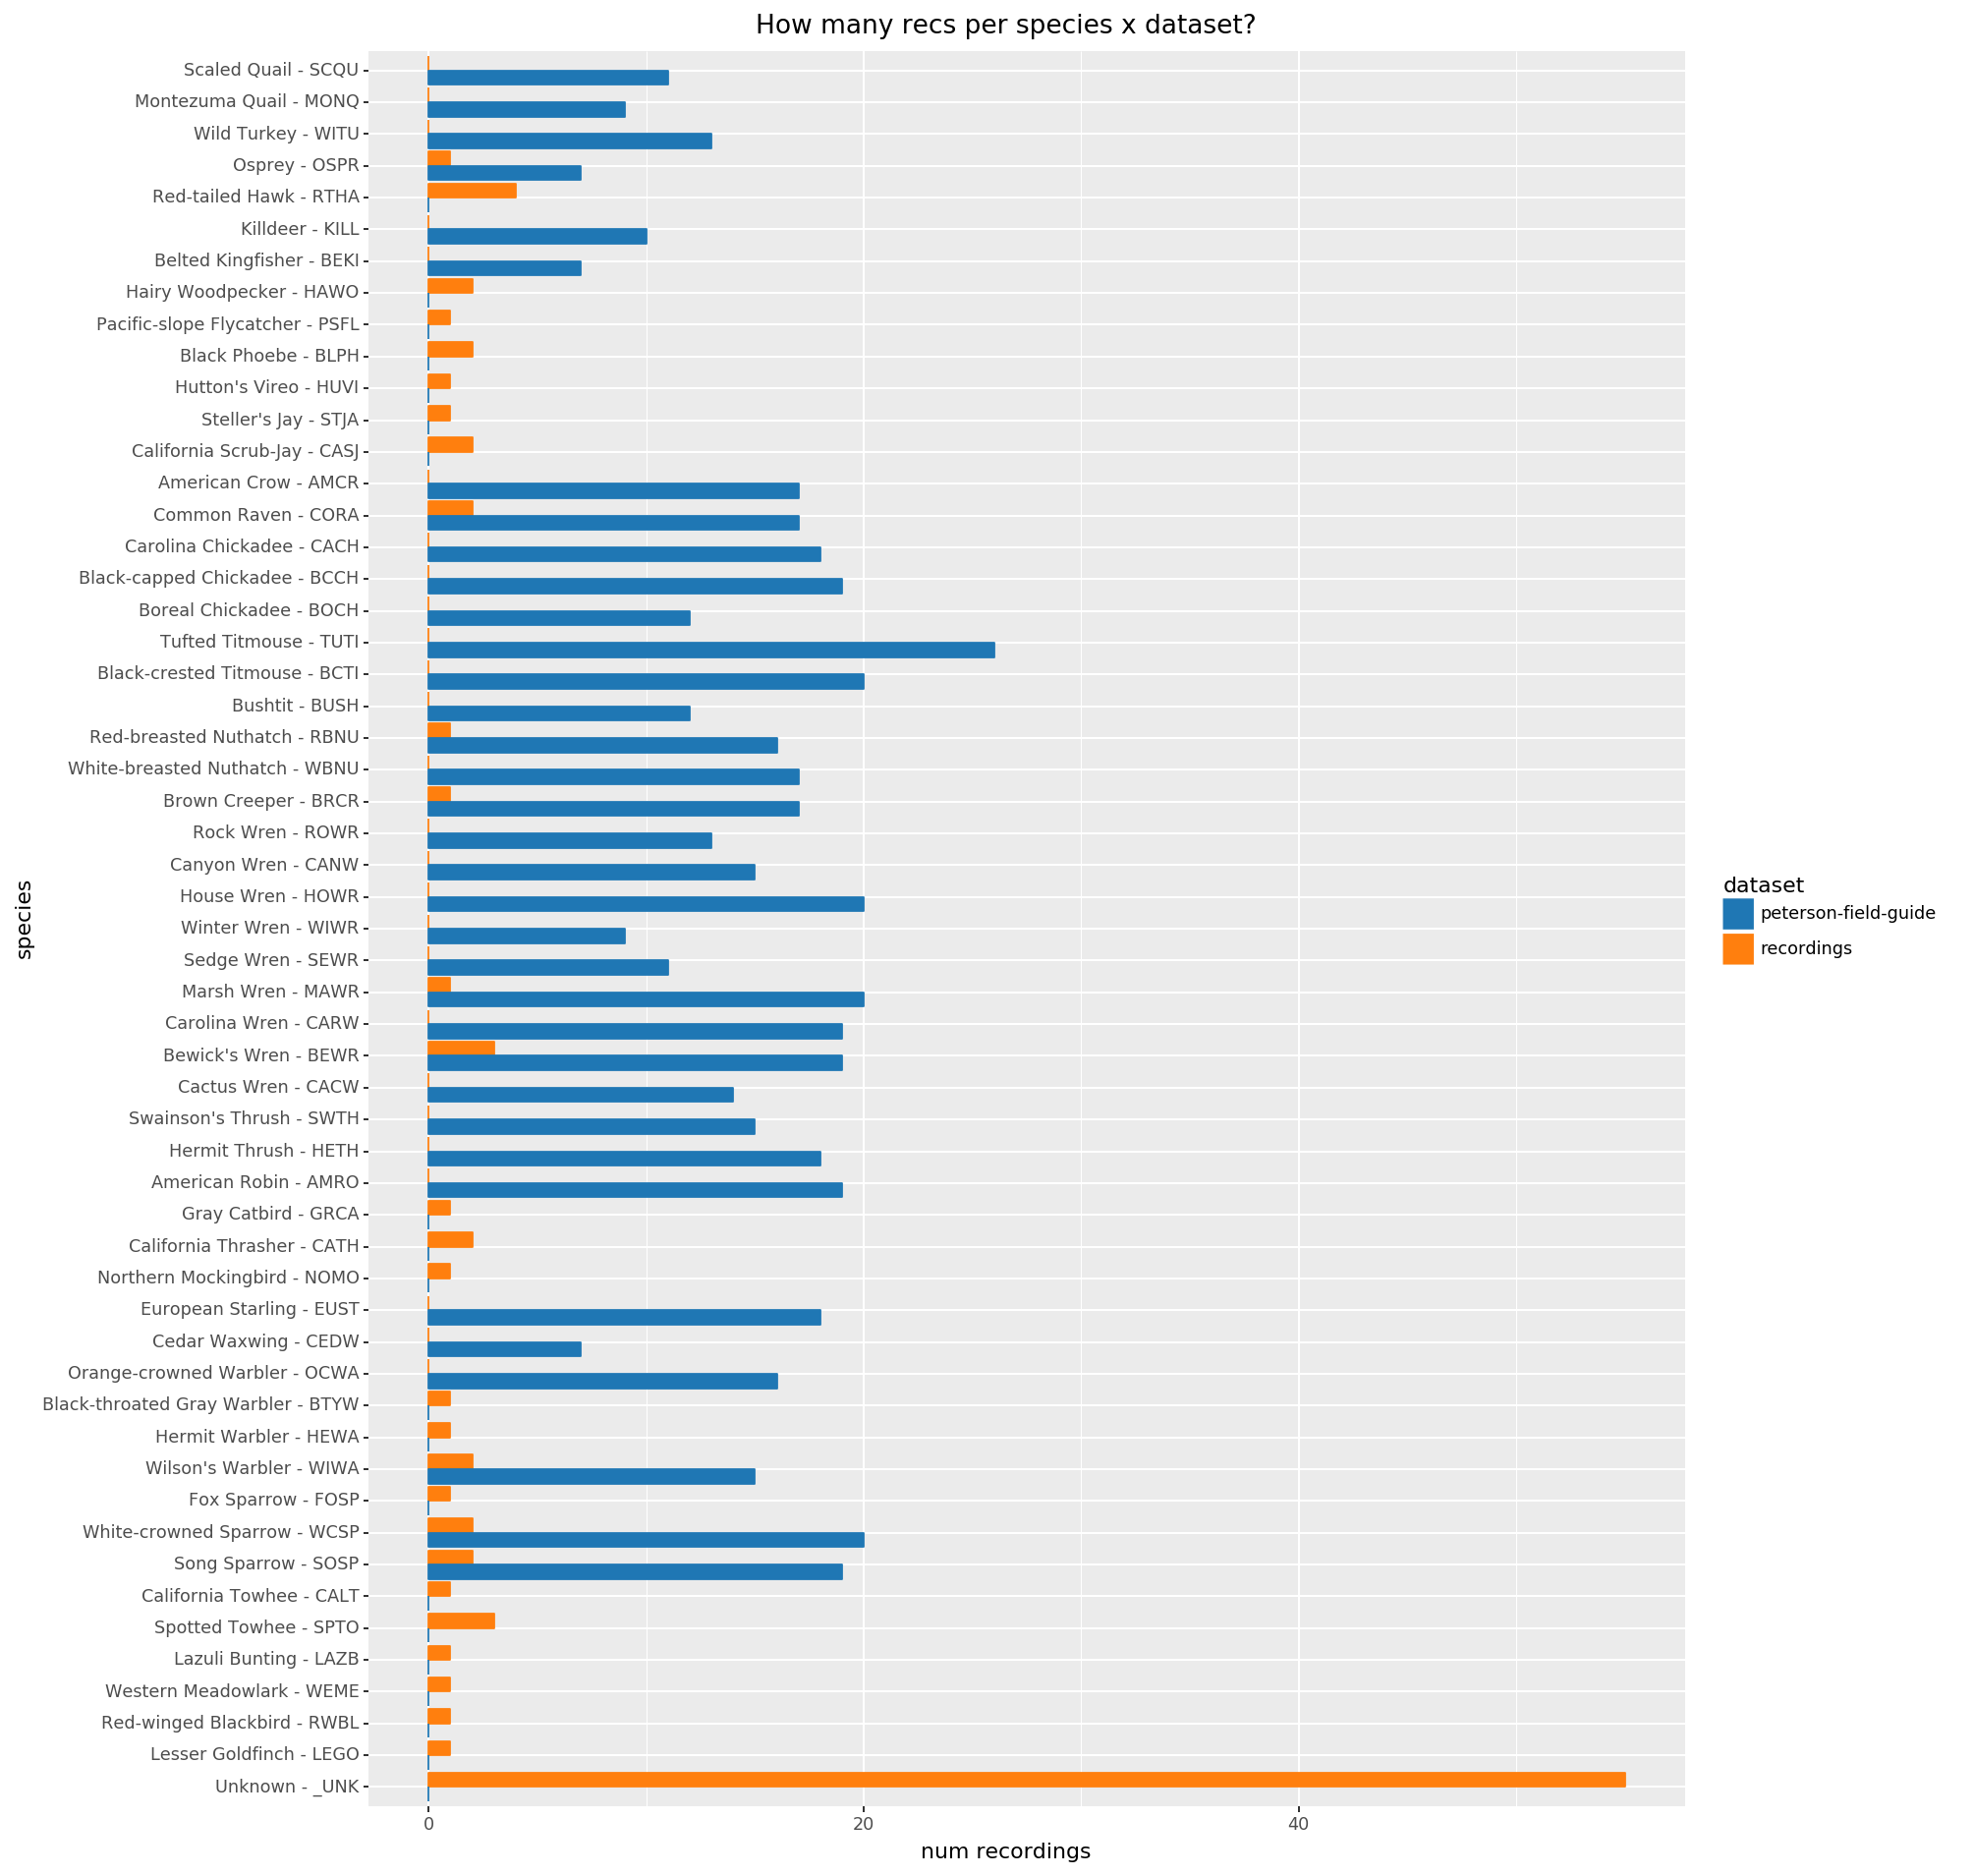

<ggplot: (300131939)>

In [ ]:
(recs
    .assign(species=lambda df: df.species_longhand)
    .assign(n=1)
    .pipe(lambda df: df.append(
        pd.DataFrame([
            dict(species=species, dataset=dataset, n=0)
            for species in df.species.unique()
            for dataset in df.dataset.unique()
        ])
        .astype({'species': df.species.dtype})
    ))
    .groupby(['dataset', 'species'])['n'].sum().reset_index()
    .pipe(df_reverse_cat, 'species')
    .pipe(ggplot, aes(x='species', y='n', color='dataset', fill='dataset'))
    + coord_flip()
    + stat_identity(geom='bar', position=position_dodge())
    + ylab('num recordings')
    + scale_color_cmap_d(mpl.cm.tab10)
    + scale_fill_cmap_d(mpl.cm.tab10)
    + theme_figsize('half')
    + ggtitle('How many recs per species x dataset?')
)

# Fit search

In [ ]:
# Load models
projection = Projection.load('peterson-v0-26bae1c')
features = projection.features
load = features.load

[06:36:01.663] Projection.load
  path: /Users/danb/hack/bubo/data/models/projection/peterson-v0-26bae1c.pkl


In [ ]:
# Add features
recs = features.transform(recs)
recs = projection.transform(recs)

[06:36:01.719] Features.spectros:in
  len(recs): 633
  len(recs) per dataset: {peterson-field-guide: 535, recordings: 98}
  sum(duration_h): 5.07
  sum(samples_mb): 768.0
  sum(samples_n): 402551191
[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[                                                                                          ] | 0% Completed |  0.2s

[                                                                                          ] | 0% Completed |  0.3s

[                                                                                          ] | 0% Completed |  0.4s

[####                                                                                      ] | 5% Completed |  0.5s

[##############                                                                            ] | 16% Completed |  0.6s

[###############                                                                           ] | 17% Completed |  0.7s

[###############                                                                           ] | 17% Completed |  0.8s

[##################                                                                        ] | 20% Completed |  0.9s

[######################                                                                    ] | 25% Completed |  1.0s

[###############################                                                           ] | 35% Completed |  1.1s

[#################################                                                         ] | 37% Completed |  1.2s

[####################################                                                      ] | 40% Completed |  1.3s

[######################################                                                    ] | 42% Completed |  1.4s

[##########################################                                                ] | 47% Completed |  1.5s

[###################################################                                       ] | 57% Completed |  1.6s

[###################################################                                       ] | 57% Completed |  1.7s

[######################################################                                    ] | 60% Completed |  1.8s

[##########################################################                                ] | 65% Completed |  2.0s

[############################################################                              ] | 67% Completed |  2.1s

[###################################################################                       ] | 75% Completed |  2.2s

[#####################################################################                     ] | 77% Completed |  2.3s

[########################################################################                  ] | 80% Completed |  2.4s

[########################################################################                  ] | 80% Completed |  2.5s

[########################################################################                  ] | 80% Completed |  2.6s

[##############################################################################            ] | 87% Completed |  2.7s

[##############################################################################            ] | 87% Completed |  2.8s

[##############################################################################            ] | 87% Completed |  2.9s

[##############################################################################            ] | 87% Completed |  3.0s

[##############################################################################            ] | 87% Completed |  3.1s

[##############################################################################            ] | 87% Completed |  3.2s

[##############################################################################            ] | 87% Completed |  3.3s

[#################################################################################         ] | 90% Completed |  3.4s

[###################################################################################       ] | 92% Completed |  3.5s

[###################################################################################       ] | 92% Completed |  3.6s

[###################################################################################       ] | 92% Completed |  3.7s

[##########################################################################################] | 100% Completed |  3.8s

[06:36:05.602] Features.spectros:out
  (f, sum(t)): [40, 1571575]
[06:36:05.606] Features.patches:in
  len(recs): 633
  len(recs) per dataset: {peterson-field-guide: 535, recordings: 98}
  sum(duration_h): 5.07
  sum(samples_mb): 768.0
  sum(samples_n): 402551191
  (f, sum(t)): [[40], 1571575]
[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[##                                                                                        ] | 2% Completed |  0.2s

[####                                                                                      ] | 5% Completed |  0.3s

[######                                                                                    ] | 7% Completed |  0.4s

[#########                                                                                 ] | 10% Completed |  0.5s

[#########                                                                                 ] | 10% Completed |  0.6s

[###########                                                                               ] | 12% Completed |  0.7s

[#############                                                                             ] | 15% Completed |  0.8s

[##################                                                                        ] | 20% Completed |  0.9s

[####################                                                                      ] | 22% Completed |  1.0s

[######################                                                                    ] | 25% Completed |  1.1s

[########################                                                                  ] | 27% Completed |  1.2s

[###########################                                                               ] | 30% Completed |  1.3s

[#############################                                                             ] | 32% Completed |  1.4s

[###############################                                                           ] | 35% Completed |  1.5s

[#################################                                                         ] | 37% Completed |  1.6s

[####################################                                                      ] | 40% Completed |  1.7s

[########################################                                                  ] | 45% Completed |  1.8s

[##########################################                                                ] | 47% Completed |  1.9s

[##########################################                                                ] | 47% Completed |  2.0s

[#############################################                                             ] | 50% Completed |  2.1s

[###############################################                                           ] | 52% Completed |  2.2s

[###############################################                                           ] | 52% Completed |  2.3s

[#################################################                                         ] | 55% Completed |  2.4s

[###################################################                                       ] | 57% Completed |  2.5s

[######################################################                                    ] | 60% Completed |  2.6s

[########################################################                                  ] | 62% Completed |  2.7s

[##########################################################                                ] | 65% Completed |  2.8s

[############################################################                              ] | 67% Completed |  3.0s

[##############################################################                            ] | 70% Completed |  3.1s

[#################################################################                         ] | 72% Completed |  3.2s

[###################################################################                       ] | 75% Completed |  3.3s

[#####################################################################                     ] | 77% Completed |  3.4s

[########################################################################                  ] | 80% Completed |  3.5s

[##########################################################################                ] | 82% Completed |  3.6s

[############################################################################              ] | 85% Completed |  3.7s

[##############################################################################            ] | 87% Completed |  3.8s

[#################################################################################         ] | 90% Completed |  3.9s

[#################################################################################         ] | 90% Completed |  4.0s

[#################################################################################         ] | 90% Completed |  4.1s

[###################################################################################       ] | 92% Completed |  4.2s

[###################################################################################       ] | 92% Completed |  4.3s

[#####################################################################################     ] | 95% Completed |  4.4s

[#####################################################################################     ] | 95% Completed |  4.5s

[##########################################################################################] | 100% Completed |  4.6s

[06:36:10.245] Features.patches:out
  (f*p, sum(t)): [160, 1569676]


[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[                                                                                          ] | 0% Completed |  0.2s

[##################                                                                        ] | 20% Completed |  0.3s

[###################                                                                       ] | 21% Completed |  0.4s

[####################################                                                      ] | 40% Completed |  0.5s

[########################################                                                  ] | 45% Completed |  0.6s

[######################################################                                    ] | 60% Completed |  0.7s

[########################################################                                  ] | 62% Completed |  0.8s

[########################################################################                  ] | 80% Completed |  0.9s

[####################################################################################      ] | 93% Completed |  1.1s

[##########################################################################################] | 100% Completed |  1.2s

In [ ]:
recs_eval = (recs
    [lambda df: df.dataset == 'peterson-field-guide']
    # [:10]  # Faster dev
    .reset_index(drop=True)
)
train_n, test_n = (len(recs_eval)+1)//2, len(recs_eval)//2
recs_train, recs_test = (recs_eval
    .pipe(sklearn.utils.shuffle, random_state=0)
    .sample(train_n + test_n, random_state=0)
    .pipe(lambda df: (
        df[:train_n],
        df[train_n : train_n + test_n],
    ))
)
log('params', **{
    'recs_eval': len(recs_eval),
    'recs_train': len(recs_train),
    'recs_test': len(recs_test),
})

[06:36:12.705] params
  recs_eval: 535
  recs_train: 268
  recs_test: 267


In [ ]:
%%time
from sp14.model import *
search = Search(
    projection=projection,
    # n_neighbors=3,
    n_neighbors=5,
    # n_neighbors=10,
)
search.fit(recs_train)

[06:36:12.741] Search.fit:in
  recs: 268
  (n, f*p): [268, 1500]
[Memory]14.8s, 0.2min   : Loading _fit from /Users/danb/hack/bubo/data/cache/joblib/sp14/model/_fit/d4b9026bd1ac5ed09ea7e7bc57bc8bba
_________________________________________________fit cache loaded - 0.0s, 0.0min


[06:36:13.167] Search.fit:out
  knn.get_params: {algorithm: auto, leaf_size: 30, metric: minkowski, metric_params: null, n_jobs: 1, n_neighbors: 5, p: 2, weights: uniform}
  knn.classes_: [SCQU, MONQ, WITU, OSPR, KILL, BEKI, AMCR, CORA, CACH, BCCH, BOCH, TUTI, BCTI, BUSH, RBNU, WBNU, BRCR, CACW, ROWR, CANW, CARW, BEWR, HOWR, WIWR, SEWR, MAWR, SWTH, HETH, AMRO, EUST, CEDW, OCWA, WIWA, SOSP, WCSP]
  knn.classes_.len: 35
CPU times: user 384 ms, sys: 38.9 ms, total: 423 ms
Wall time: 430 ms


# Eval search

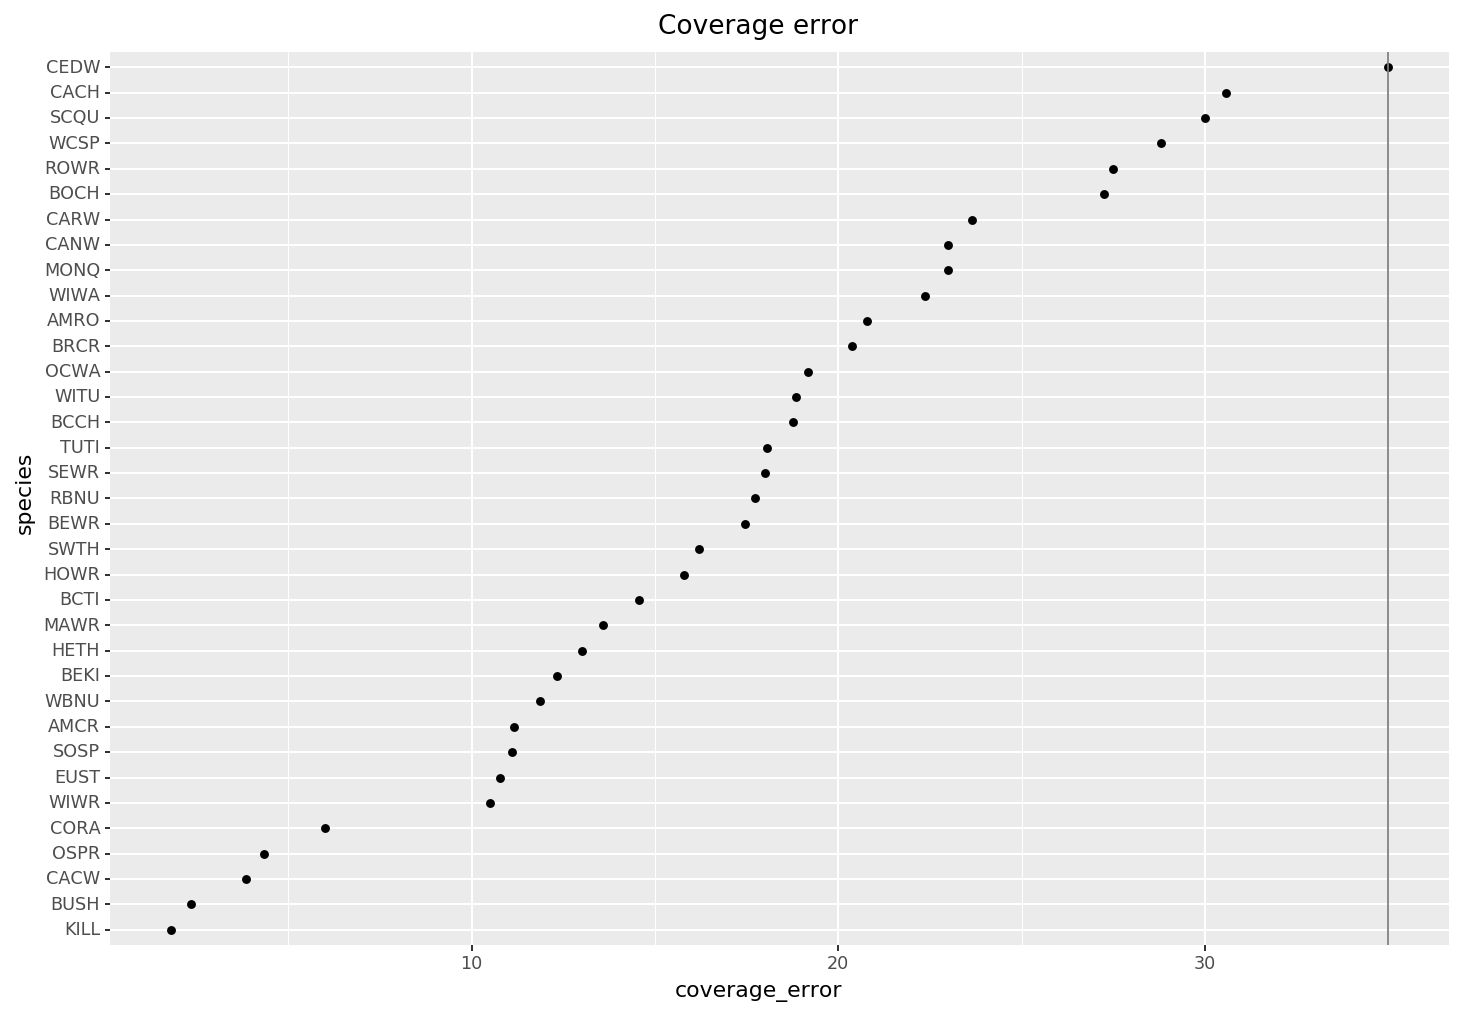

<ggplot: (-9223372036548080184)>

In [ ]:
(search.coverage_error(recs_test, by='species')
    .pipe(lambda df: df_transform_cat(df, lambda _: df.sort_values('coverage_error').species, 'species'))
    .pipe(ggplot, aes(x='species', y='coverage_error'))
    + geom_point()
    + coord_flip()
    + geom_hline(yintercept=len(set(search.fit_classes_)), color='grey')
    + theme_figsize('inline')
    + ggtitle('Coverage error')
)

[06:36:15.253] Search.species
  recs: 267
  (n, k*a): [267, 1500]
  species: 267
[06:36:15.257] Search.confusion_matrix
  M: [35, 35]


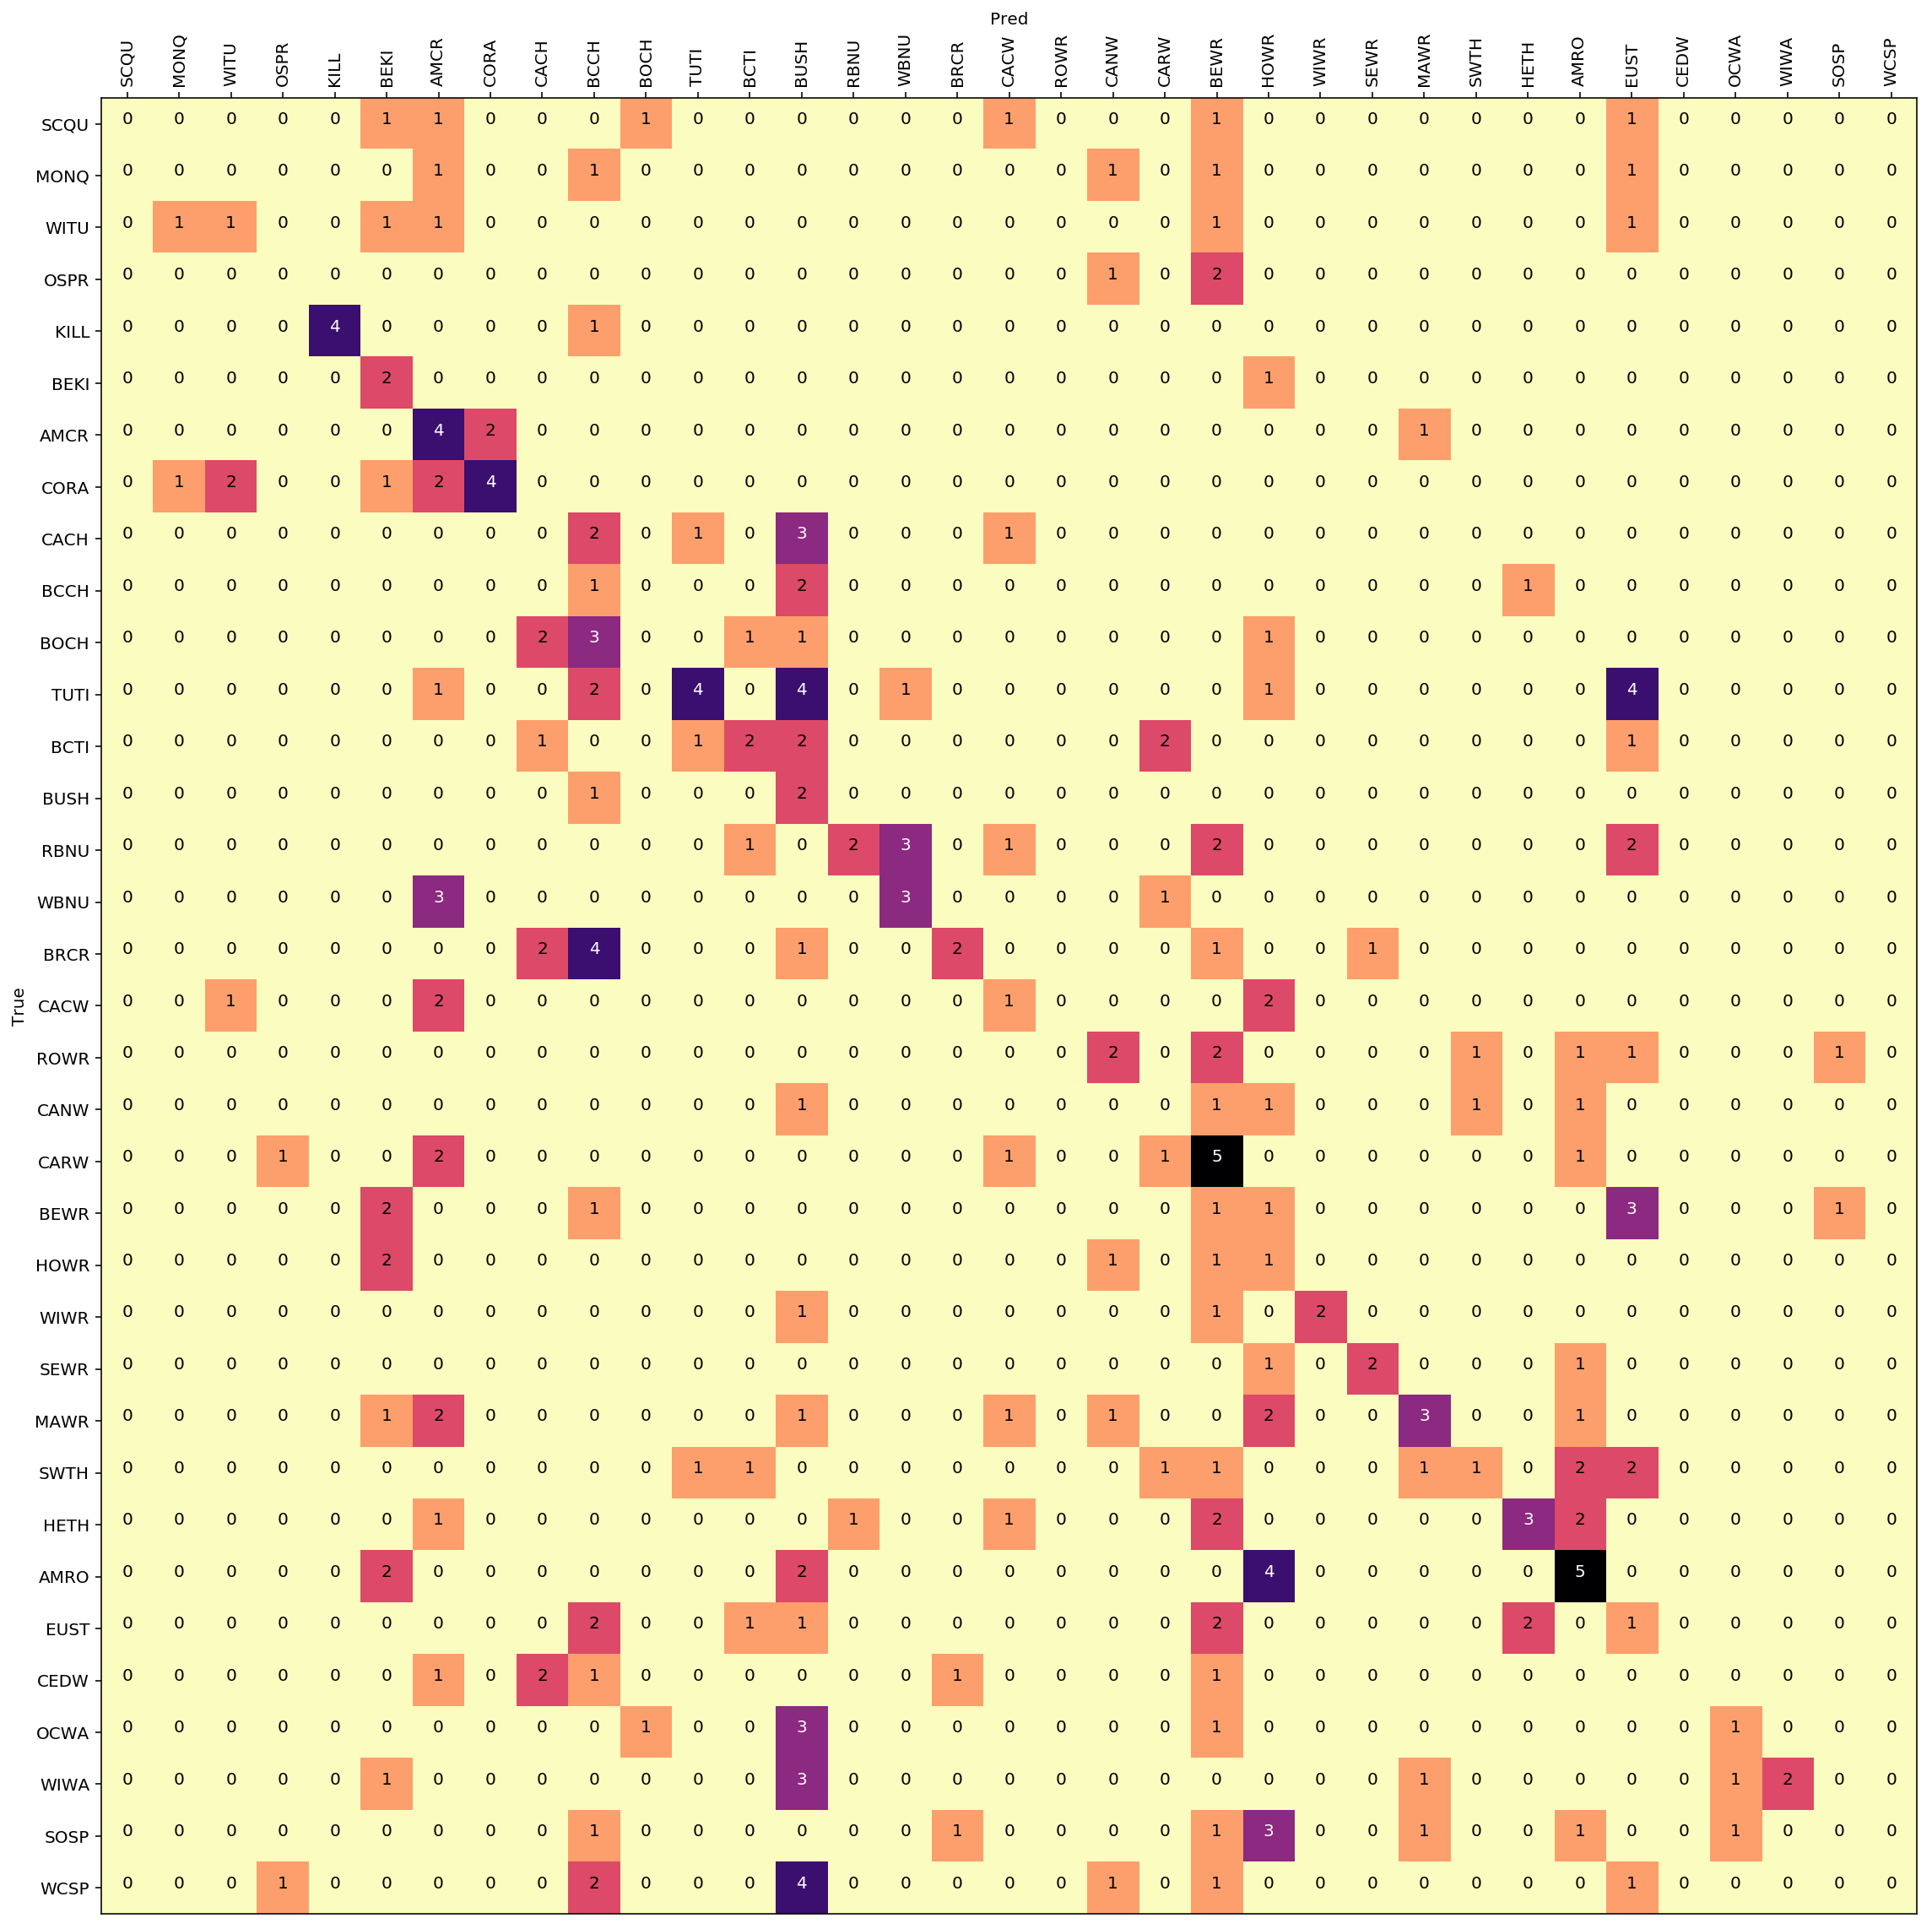

CPU times: user 5.37 s, sys: 562 ms, total: 5.93 s
Wall time: 5.34 s


In [ ]:
%%time
with with_figsize('full'):
    search.plot_confusion_matrix(recs_test)

In [ ]:
# Example usage
# search.species(recs_test[:5])
# search.species_probs(recs_test[:5]).T[:search.knn_.n_neighbors + 1].T
# search.similar_recs(recs_test[:5], 10)